In [1]:
import pandas as pd
import numpy as np

# create a random number generator that will be used to set the randomness
rng = np.random.RandomState(1)

def generate_data(n_samples=30):
    """Generate synthetic dataset. Returns `data_train`, `data_test`,
    `target_train`."""
    x_min, x_max = -3, 3
    x = rng.uniform(x_min, x_max, size=n_samples)
    noise = 4.0 * rng.randn(n_samples)
    y = x**3 - 0.5 * (x + 1) ** 2 + noise
    y /= y.std()

    data_train = pd.DataFrame(x, columns=["Feature"])
    data_test = pd.DataFrame(
        np.linspace(x_max, x_min, num=300), columns=["Feature"]
    )
    target_train = pd.Series(y, name="Target")

    return data_train, data_test, target_train

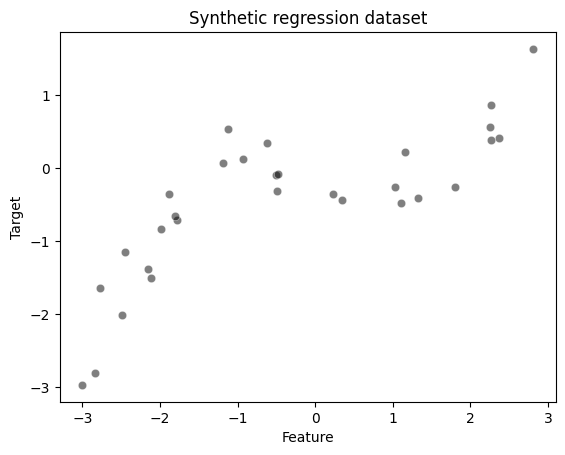

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

data_train, data_test, target_train = generate_data(n_samples=30)
sns.scatterplot(
    x=data_train["Feature"], y=target_train, color="black", alpha=0.5
)
_ = plt.title("Synthetic regression dataset")

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model

tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(data_train, target_train)
y_pred = tree.predict(data_test)

# knn = KNeighborsRegressor()
# knn.fit(data_train, target_train)
# y_pred = knn.predict(data_test)

# lrn = linear_model.LinearRegression()
# lrn.fit(data_train, target_train)
# y_pred = lrn.predict(data_test)


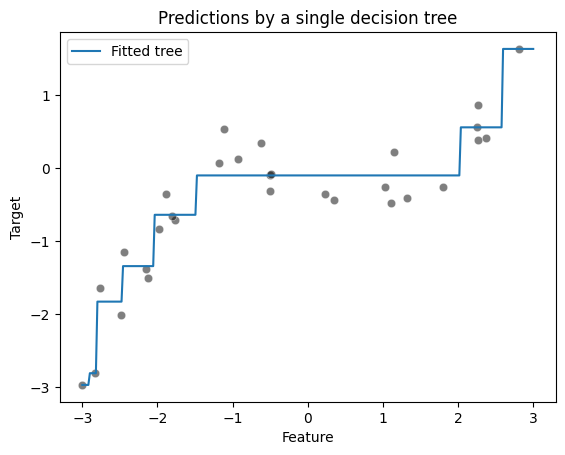

In [14]:
sns.scatterplot(
    x=data_train["Feature"], y=target_train, color="black", alpha=0.5
)
plt.plot(data_test["Feature"], y_pred, label="Fitted tree")
plt.legend()
_ = plt.title("Predictions by a single decision tree")

In [10]:
def bootstrap_sample(data, target):
    # Indices corresponding to a sampling with replacement of the same sample
    # size than the original data
    bootstrap_indices = rng.choice(
        np.arange(target.shape[0]),
        size=target.shape[0],
        replace=True,
    )
    # In pandas, we need to use `.iloc` to extract rows using an integer
    # position index:
    data_bootstrap = data.iloc[bootstrap_indices]
    target_bootstrap = target.iloc[bootstrap_indices]
    return data_bootstrap, target_bootstrap

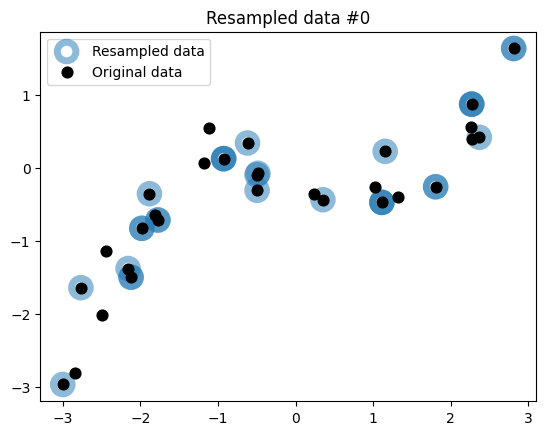

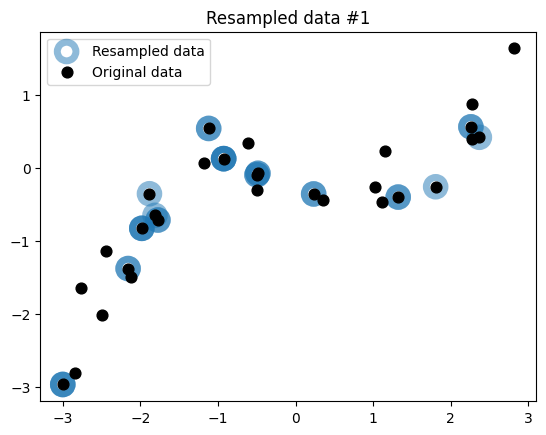

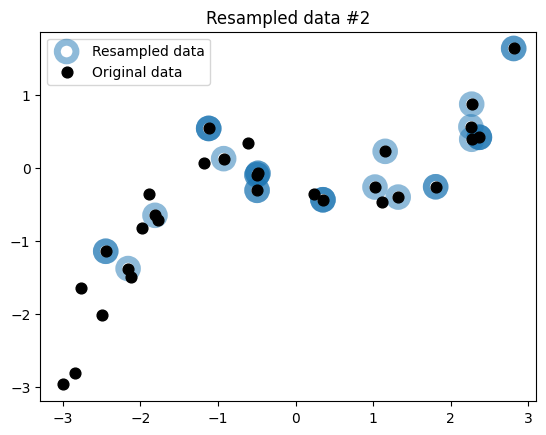

In [11]:
n_bootstraps = 3
for bootstrap_idx in range(n_bootstraps):
    # draw a bootstrap from the original data
    data_bootstrap, target_bootstrap = bootstrap_sample(
        data_train,
        target_train,
    )
    plt.figure()
    plt.scatter(
        data_bootstrap["Feature"],
        target_bootstrap,
        color="tab:blue",
        facecolors="none",
        alpha=0.5,
        label="Resampled data",
        s=180,
        linewidth=5,
    )
    plt.scatter(
        data_train["Feature"],
        target_train,
        color="black",
        s=60,
        alpha=1,
        label="Original data",
    )
    plt.title(f"Resampled data #{bootstrap_idx}")
    plt.legend()

In [12]:
data_train_huge, data_test_huge, target_train_huge = generate_data(
    n_samples=100_000
)
data_bootstrap_sample, target_bootstrap_sample = bootstrap_sample(
    data_train_huge, target_train_huge
)

ratio_unique_sample = (
    np.unique(data_bootstrap_sample).size / data_bootstrap_sample.size
)
print(
    "Percentage of samples present in the original dataset: "
    f"{ratio_unique_sample * 100:.1f}%"
)

Percentage of samples present in the original dataset: 63.2%


In [15]:
bag_of_trees = []
for bootstrap_idx in range(n_bootstraps):
    tree = DecisionTreeRegressor(max_depth=3, random_state=0)

    data_bootstrap_sample, target_bootstrap_sample = bootstrap_sample(
        data_train, target_train
    )
    tree.fit(data_bootstrap_sample, target_bootstrap_sample)
    bag_of_trees.append(tree)

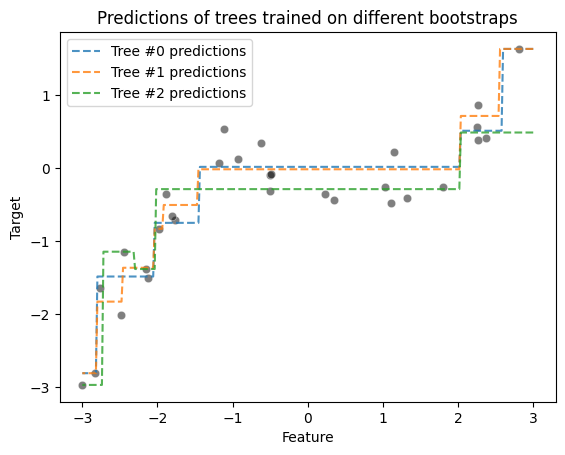

In [16]:
sns.scatterplot(
    x=data_train["Feature"], y=target_train, color="black", alpha=0.5
)
for tree_idx, tree in enumerate(bag_of_trees):
    tree_predictions = tree.predict(data_test)
    plt.plot(
        data_test["Feature"],
        tree_predictions,
        linestyle="--",
        alpha=0.8,
        label=f"Tree #{tree_idx} predictions",
    )

plt.legend()
_ = plt.title("Predictions of trees trained on different bootstraps")

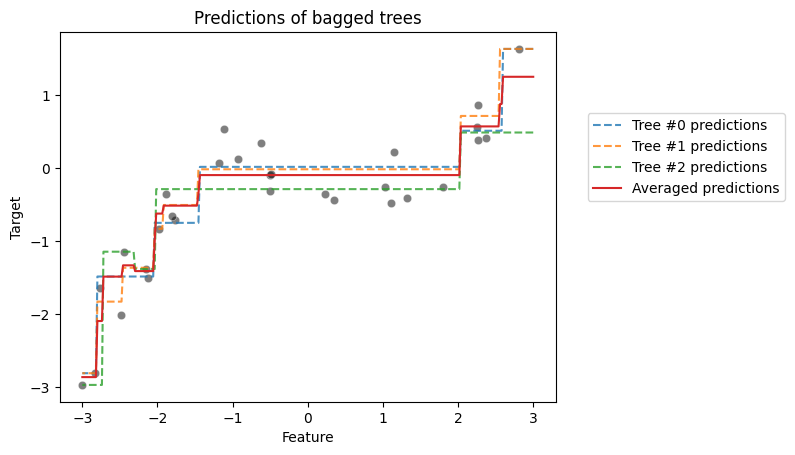

In [17]:
sns.scatterplot(
    x=data_train["Feature"], y=target_train, color="black", alpha=0.5
)

bag_predictions = []
for tree_idx, tree in enumerate(bag_of_trees):
    tree_predictions = tree.predict(data_test)
    plt.plot(
        data_test["Feature"],
        tree_predictions,
        linestyle="--",
        alpha=0.8,
        label=f"Tree #{tree_idx} predictions",
    )
    bag_predictions.append(tree_predictions)

bag_predictions = np.mean(bag_predictions, axis=0)
plt.plot(
    data_test["Feature"],
    bag_predictions,
    label="Averaged predictions",
    linestyle="-",
)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Predictions of bagged trees")